In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')

In [2]:
# Training data
data = pd.read_excel("using machine learning(1).xlsx")
data.head()

,MoSold,YrSold,LotArea,BedroomAbvGr,SalePrice
0,2,2008,8450,3,208500
1,5,2007,9600,3,181500
2,9,2008,11250,3,223500
3,2,2006,9550,3,140000
4,12,2008,14260,4,250000


In [3]:
data.columns

Index(['MoSold', 'YrSold', 'LotArea', 'BedroomAbvGr', 'SalePrice'], dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   MoSold        1400 non-null   int64
 1   YrSold        1400 non-null   int64
 2   LotArea       1400 non-null   int64
 3   BedroomAbvGr  1400 non-null   int64
 4   SalePrice     1400 non-null   int64
dtypes: int64(5)
memory usage: 54.8 KB


# EDA

In [5]:
# Function to plot a boxplot
def box(data):
    plt.figure(figsize=(10, 5))
    plt.boxplot(data)
    plt.show()

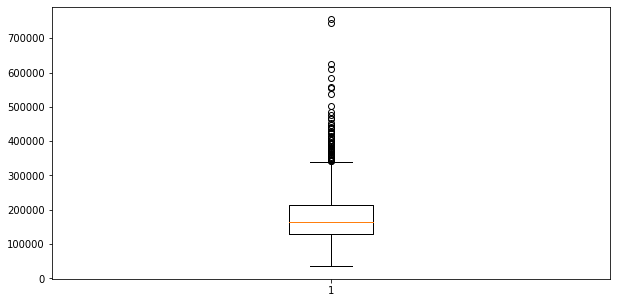

In [6]:
# Boxplot to check outliers form SalePrice variable
box(data.SalePrice)

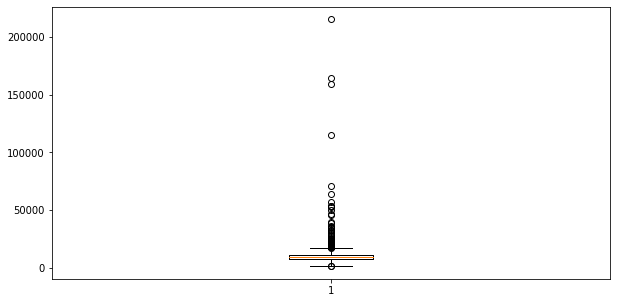

In [7]:
# Boxplot of LotArea variable
box(data.LotArea)

<h4>Function to remove Outliers

In [8]:
# Function to remove outliers
def drop_outiers(data, field):
    irq = 1.5 * (np.percentile(data[field], 75) - np.percentile(data[field], 25))
    data1 = data[data[field] > (irq + np.percentile(data[field], 75))]
    data2 = data[data[field] < (np.percentile(data[field], 25) - irq)]
    return data1, data2

In [9]:
data1_up = drop_outiers(data, 'SalePrice')[0]
print('Outliers size for SalePrice', data1_up.shape[0])
# Dropping the outliers
data.drop(data1_up.index, inplace=True)

Outliers size for SalePrice 60


In [10]:
# Dropping the outliers
data2_up = drop_outiers(data, 'LotArea')[0]
data2_down = drop_outiers(data, 'LotArea')[1]
print('Outliers size for LotArea', data2_up.shape[0] + data2_down.shape[0])
data.drop(data2_up.index, inplace=True)
data.drop(data2_down.index, inplace=True)

# New Sape of the data after removing outliers
print('New shape of the data after removing outliers in', data.shape)

Outliers size for LotArea 67
New shape of the data after removing outliers in (1273, 5)


<h4>No missing values

Distribution between variables

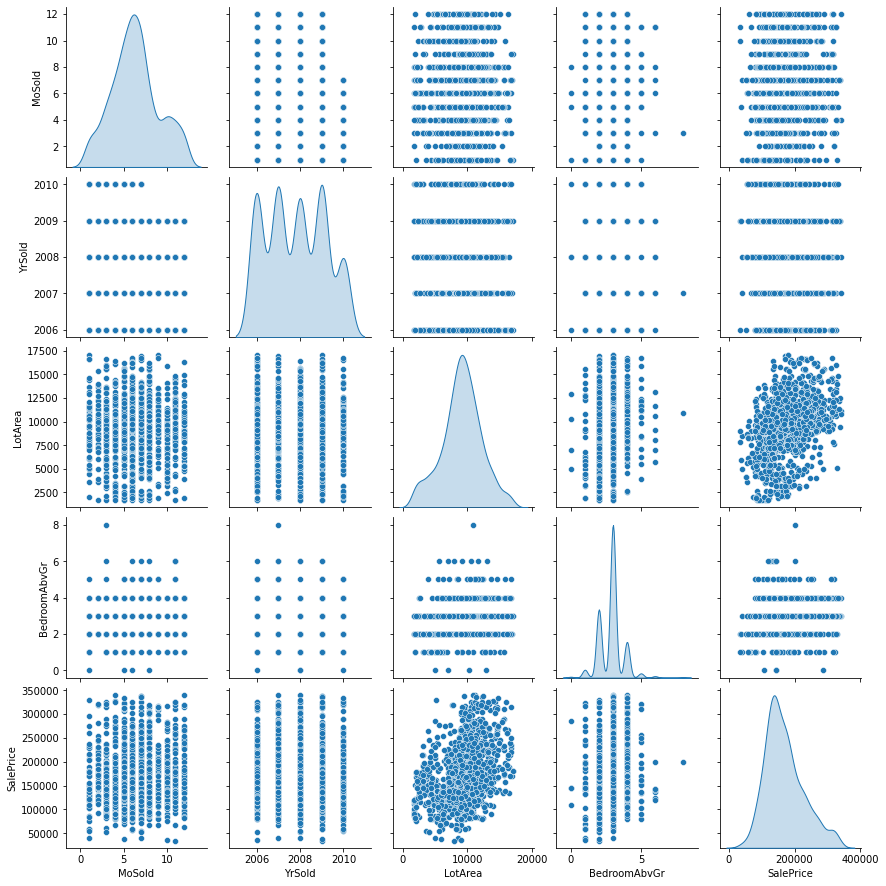

In [11]:
sns.pairplot(kind='scatter',diag_kind='kde',data=data)

We can see that SalePrice has nomal distribution with long rigt tail as well as LotArea

MoSold also has normal distribution and YrSold has Multi-gaussian distribution because it has integrated all the MoSold.

<h4>correlation

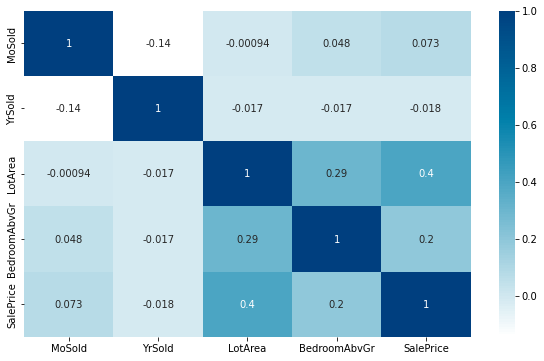

In [12]:
plt.figure(figsize=(10,6))
sns.heatmap(data=data.corr(), center=True,annot=True, cmap='ocean_r')
plt.show()

It has been shown that there is no correlation between the input vairables,
therefore we can use linear regression for the SalePrice prediction

It also cleary showing that YrSold(Year Sold) is having negative correlation
with other variables.Hence he can conclude that it can be useless in our prediction

<h4>Applying Linear Regression to built a model for prediction

In [13]:
# Standarization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
columns = ['MoSold', 'YrSold', 'LotArea', 'BedroomAbvGr', 'SalePrice']
data = pd.DataFrame(scaler.fit_transform(data[columns]), columns=columns)
predictors = ['MoSold', 'YrSold', 'LotArea', 'BedroomAbvGr']
X = data[predictors] # Predictors

#X = scaler.fit_transform(X)
y = data.iloc[:,-1] # Target variable
#y = scaler.fit_transform(np.array(y).reshape(-1, 1))

In [14]:
data.head()

,MoSold,YrSold,LotArea,BedroomAbvGr,SalePrice
0,-1.603468,0.146743,-0.213971,0.168681,0.673682
1,-0.489065,-0.606497,0.161800,0.168681,0.213002
2,0.996806,0.146743,0.700949,0.168681,0.929615
3,-1.603468,-1.359737,0.145462,0.168681,-0.495079
4,2.111209,0.146743,1.684489,1.417119,1.381763


In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df = data.copy()
def scaler(data):
    scaler = StandardScaler()
    new_data = scaler.fit_transform(data)
    return new_data

df = scaler(df)

In [16]:
df = pd.DataFrame(df, columns=columns )
predictors = ['MoSold', 'YrSold', 'LotArea', 'BedroomAbvGr']
X = data[predictors] # Predictors
y = data.iloc[:,-1]

In [17]:
# Splitting data into train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [18]:
# Instantiate the model and fit it
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [19]:
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

In [20]:
# calculating the r2 score value
from sklearn.metrics import r2_score
print(r2_score(np.array(y_test).reshape(-1, 1), pred_test) * 100)

16.074562278104874


In [21]:
from termcolor import colored as cl
from sklearn.metrics import explained_variance_score as evs
print(cl('Explained of linear model is {}'.format(evs(y_test,pred_test)), attrs = ['bold']))


Explained of linear model is 0.16075983639868663


<h4>Applying KNN algorithm to built a model for prediction

In [22]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor(n_neighbors=2)
regressor.fit(data[predictors], data.SalePrice)

KNeighborsRegressor(n_neighbors=2)

In [23]:
from sklearn.metrics import mean_squared_error
import math

pre = regressor.predict(X_test)
pre_y = regressor.predict(X_train)

# print('Training Error',math.sqrt(mean_squared_error(y_train, pre_y)))
# print('Testing Error',math.sqrt(mean_squared_error(y_test, pre)))

#print(r2_score(np.array(y_test).reshape(-1, 1), pre) * 100)

In [24]:
print(r2_score(np.array(y_test).reshape(-1, 1), pre) * 100)

64.37000097836037


In [25]:
print(cl('Explained of linear model is {}'.format(evs(y_test,pre)), attrs = ['bold']))

Explained of linear model is 0.6437085975449361


In [26]:
error = []

from sklearn.metrics import mean_squared_error

# Calculating MAE error for K values between 1 and 39
for i in range(1, 40):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    mae = mean_squared_error(y_test, pred_i)
    error.append(mae)

Text(0, 0.5, 'Mean Absolute Error')

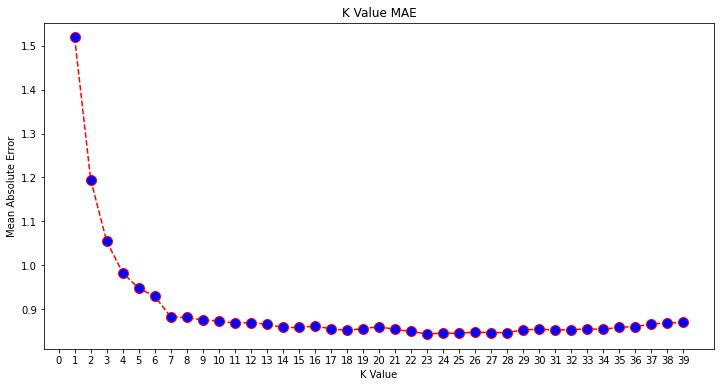

In [27]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', 
         linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.xticks([i for i in range(0, 40)])
         
plt.title('K Value MAE')
plt.xlabel('K Value')
plt.ylabel('Mean Absolute Error')

In [28]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor(n_neighbors=3)
regressor.fit(data[predictors], data.SalePrice)

KNeighborsRegressor(n_neighbors=3)

In [29]:
pre = regressor.predict(X_test)
pre_y = regressor.predict(X_train)

In [30]:
print(r2_score(np.array(y_test).reshape(-1, 1), pre) * 100)

51.793447429383455


In [31]:
print(cl('Explained of linear model is {}'.format(evs(y_test,pre)), attrs = ['bold']))

Explained of linear model is 0.5180622223737139


In [32]:
import math
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError

In [33]:
# def scale_datasets(x_train, x_test):

#     """
#     Standard Scale test and train data
#     Z - Score normalization
#     """
#     standard_scaler = StandardScaler()
#     x_train_scaled = pd.DataFrame(
#       standard_scaler.fit_transform(x_train),
#       columns=predictors
#     )
#     x_test_scaled = pd.DataFrame(
#       standard_scaler.transform(x_test),
#       columns = predictors
#     )
#     return x_train_scaled, x_test_scaled
# x_train_scaled, x_test_scaled = scale_datasets(X_train, X_test)

In [34]:
hidden_units1 = 120
hidden_units2 = 160
hidden_units3 = 130
learning_rate = 0.001
# Creating model using the Sequential in tensorflow
def build_model_using_sequential():
    model = Sequential([
    Dense(hidden_units1, activation='relu'),
    Dense(hidden_units2, activation='relu'),
    Dense(hidden_units3, activation='relu'),
    Dense(1, kernel_initializer='normal', activation='linear')
  ])
    return model
# build the model
model = build_model_using_sequential()

In [35]:
# # Splitting data into train and test data
# X = data[predictors].values
# y = data.iloc[:,-1].values

# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [36]:
# loss function
msle = MeanSquaredLogarithmicError()
model.compile(
    loss=msle, 
    optimizer=Adam(learning_rate=learning_rate), 
    metrics=[msle]
)
# train the model
history = model.fit(
    X_train,
    y_train, 
    epochs=5, 
    batch_size=64,
    validation_split=0.2
)

Epoch 1/5
12/12 [==============================] - 2s 39ms/step - loss: 0.1461 - mean_squared_logarithmic_error: 0.1459 - val_loss: 0.1246 - val_mean_squared_logarithmic_error: 0.1246
Epoch 2/5
12/12 [==============================] - 0s 10ms/step - loss: 0.1254 - mean_squared_logarithmic_error: 0.1255 - val_loss: 0.1144 - val_mean_squared_logarithmic_error: 0.1144
Epoch 3/5
12/12 [==============================] - 0s 11ms/step - loss: 0.1215 - mean_squared_logarithmic_error: 0.1215 - val_loss: 0.1132 - val_mean_squared_logarithmic_error: 0.1132
Epoch 4/5
12/12 [==============================] - 0s 9ms/step - loss: 0.1195 - mean_squared_logarithmic_error: 0.1196 - val_loss: 0.1122 - val_mean_squared_logarithmic_error: 0.1122
Epoch 5/5
12/12 [==============================] - 0s 10ms/step - loss: 0.1175 - mean_squared_logarithmic_error: 0.1175 - val_loss: 0.1113 - val_mean_squared_logarithmic_error: 0.1113


In [37]:
y_test

1178   -0.495079
1186    0.571309
427     0.306844
351    -1.501749
364     1.304983
          ...   
669     0.170347
552    -0.861917
122     0.972270
879    -0.495079
761    -0.196491
Name: SalePrice, Length: 319, dtype: float64

In [38]:
b = model.predict(X_test)
v = b.reshape(-1,)

In [39]:
r2_score(y_test, v)*100

4.651909682576905

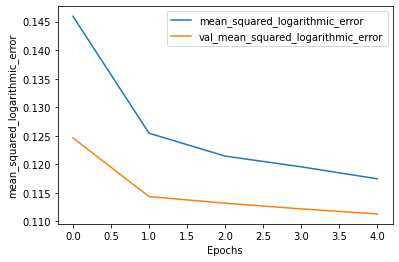

In [40]:
def plot_history(history, key):
  plt.plot(history.history[key])
  plt.plot(history.history['val_'+key])
  plt.xlabel("Epochs")
  plt.ylabel(key)
  plt.legend([key, 'val_'+key])
  plt.show()
# Plot the history
plot_history(history, 'mean_squared_logarithmic_error')

       loss  mean_squared_logarithmic_error  val_loss  \
0  0.146149                        0.145939  0.124650   
1  0.125444                        0.125453  0.114385   
2  0.121511                        0.121451  0.113215   
3  0.119524                        0.119568  0.112202   
4  0.117477                        0.117475  0.111322   

   val_mean_squared_logarithmic_error  Epcohs  
0                            0.124631       0  
1                            0.114360       1  
2                            0.113201       2  
3                            0.112205       3  
4                            0.111324       4  


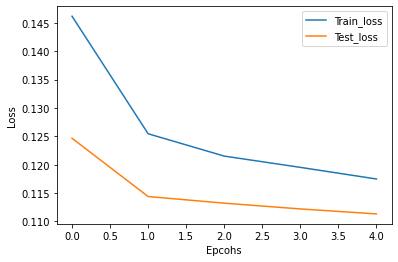

In [41]:
import matplotlib.pyplot as plt 
import pandas as pd 
r1=pd.DataFrame(history.history) 
r1['Epcohs'] = history.epoch 
print(r1.tail()) 
plt.plot(r1['Epcohs'],r1['loss'],label='Train_loss') 
plt.plot(r1['Epcohs'],r1['val_loss'],label='Test_loss')
plt.xlabel('Epcohs') 
plt.ylabel('Loss') 
plt.legend() 
plt.show() 
 

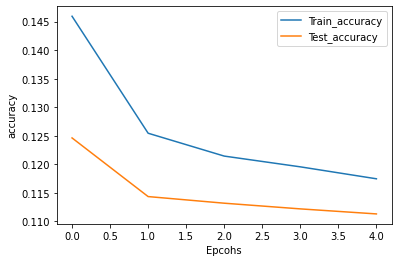

In [42]:
plt.plot(r1['Epcohs'],r1['mean_squared_logarithmic_error'],label='Train_accuracy') 
plt.plot(r1['Epcohs'],r1['val_mean_squared_logarithmic_error'],label='Test_accuracy')
plt.xlabel('Epcohs') 
plt.ylabel('accuracy') 
plt.legend() 
plt.show()